In [1]:
# !pip install deepchecks -U --user
# !pip install dabl
# !pip install 'scikit-optimize[plots]'
import warnings
warnings.filterwarnings('ignore')
from deepchecks.tabular.suites import full_suite
from deepchecks.tabular import Dataset
from skopt.plots import plot_objective, plot_evaluations, plot_convergence, plot_regret
from utils3 import run_config
from configs3 import music,santander_customer_satisfaction,Wids2021,ionosphere,fetal_health,santander,California,playground,Wine,Medicalpremium,Avocado
import pickle
from skopt import gp_minimize, forest_minimize
from skopt.utils import use_named_args
from skopt.plots import plot_objective, plot_evaluations, plot_convergence, plot_regret
from skopt.space import Categorical, Integer, Real
import utils3
from matplotlib import pyplot as plt
suite = full_suite()

0it [00:00, ?it/s]

datasets santander, val oof mean_squared_error score 57.18459398979636,val oof r2 score 0.1564285640022398,        mean_squared_error alpha 0 - score 58.040976651405586, val oof r2 score alpha 0 0.14379544201581496         run_time 916.159708738327, total size 4459, num fet 998


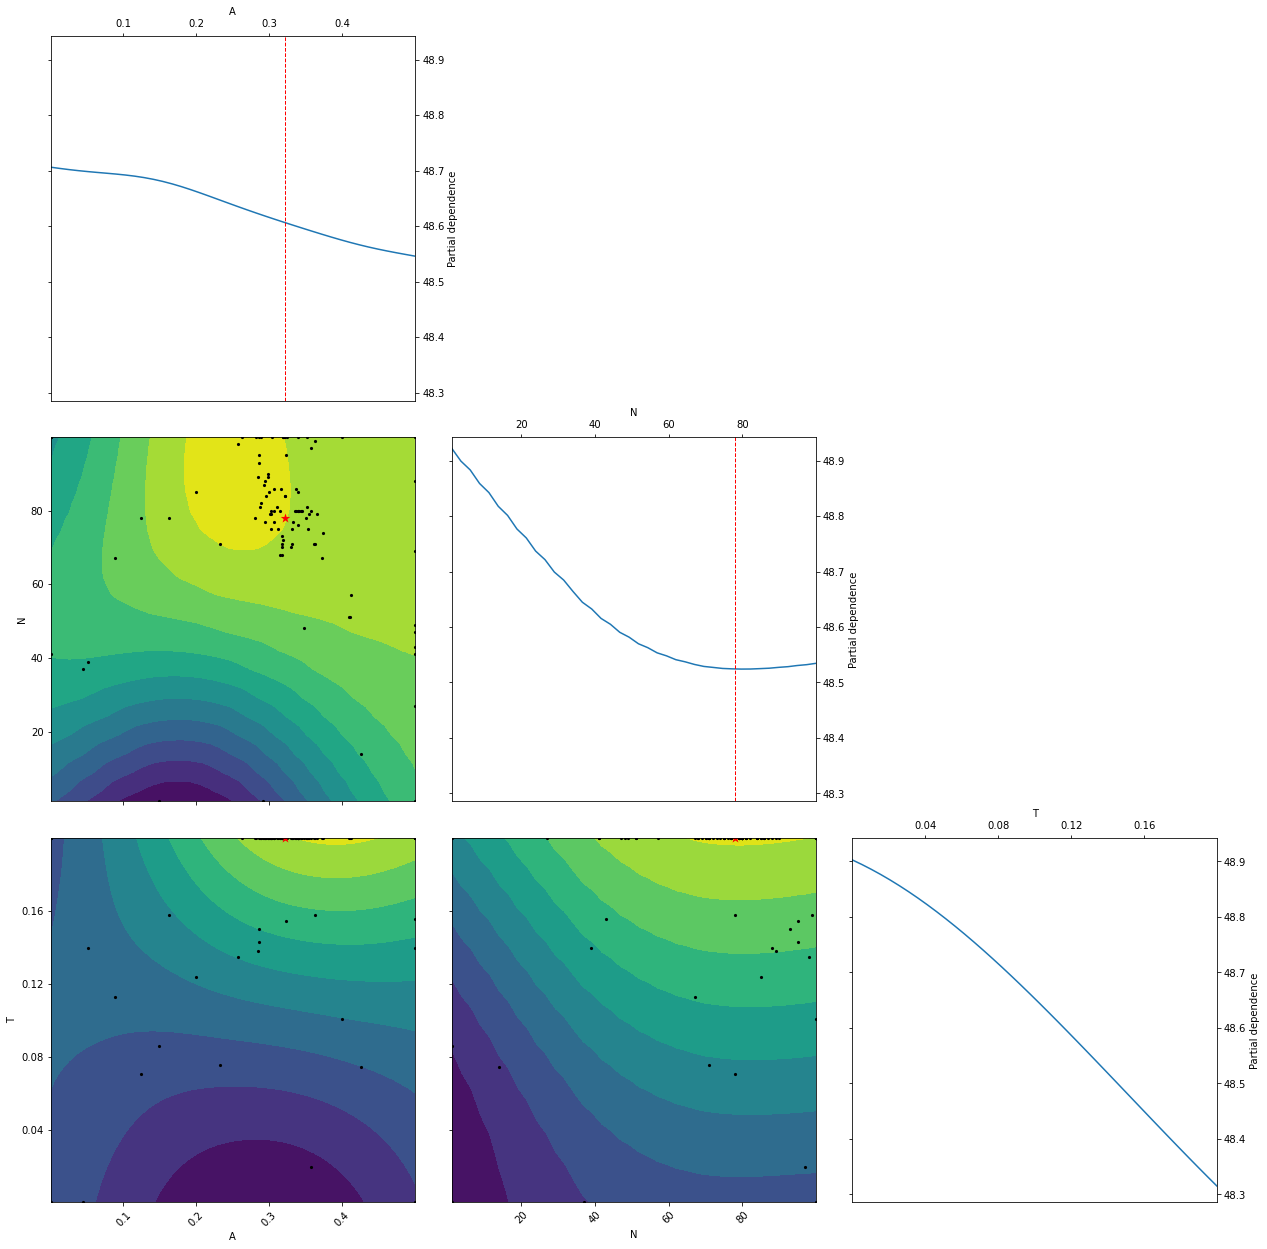

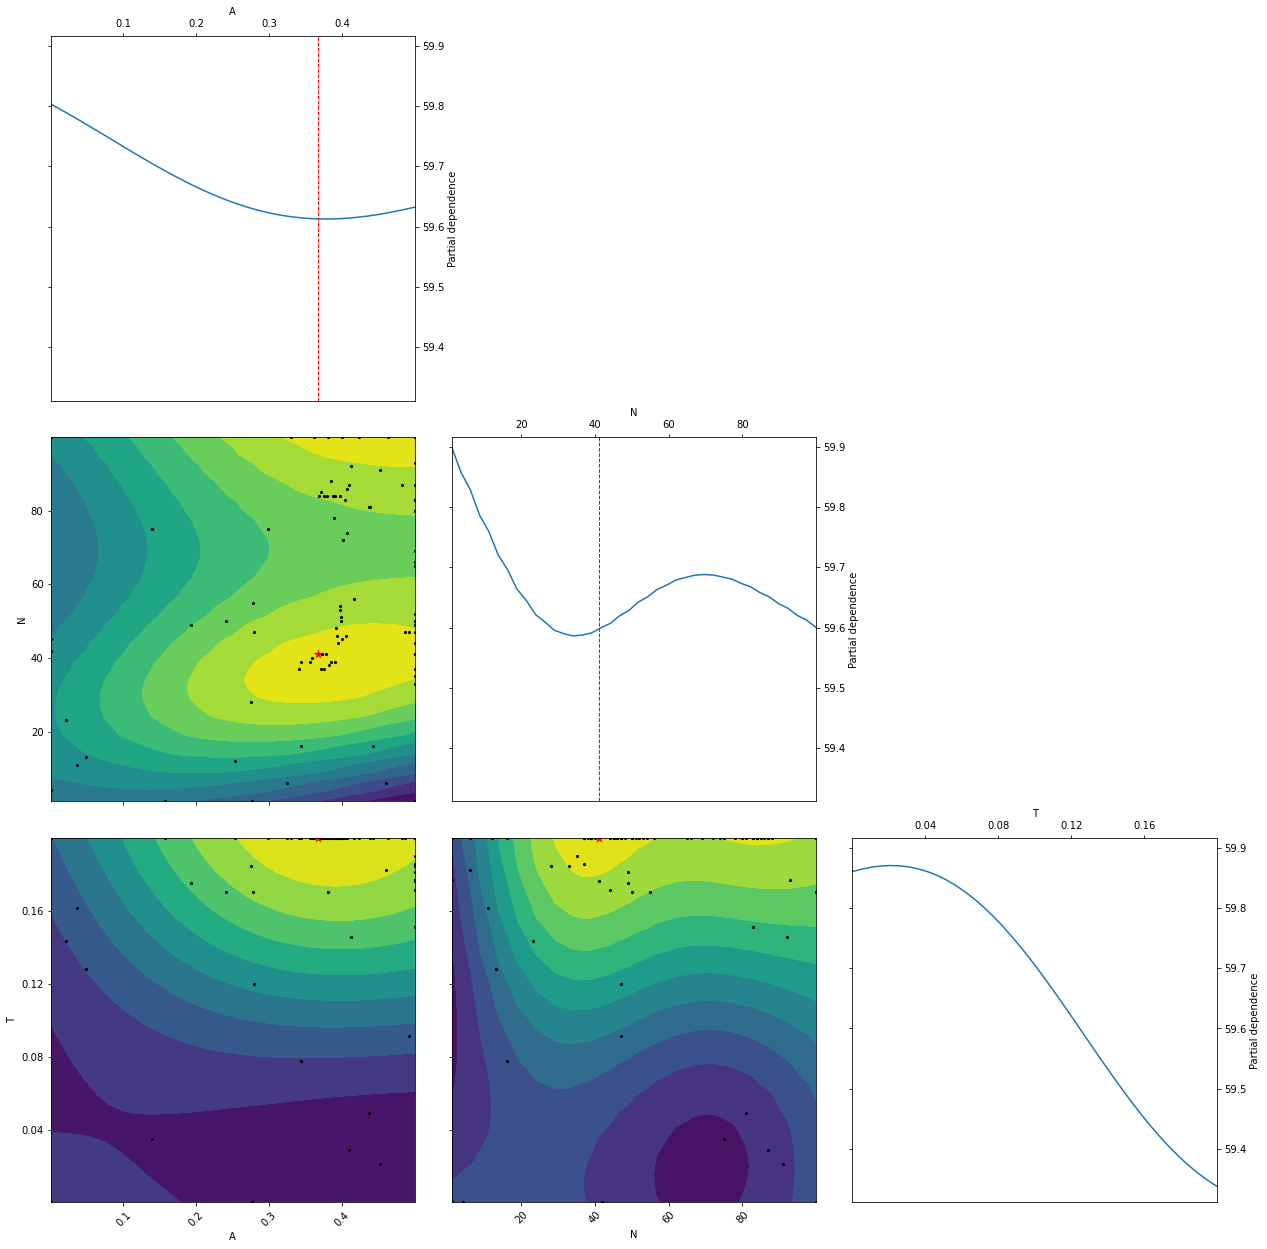

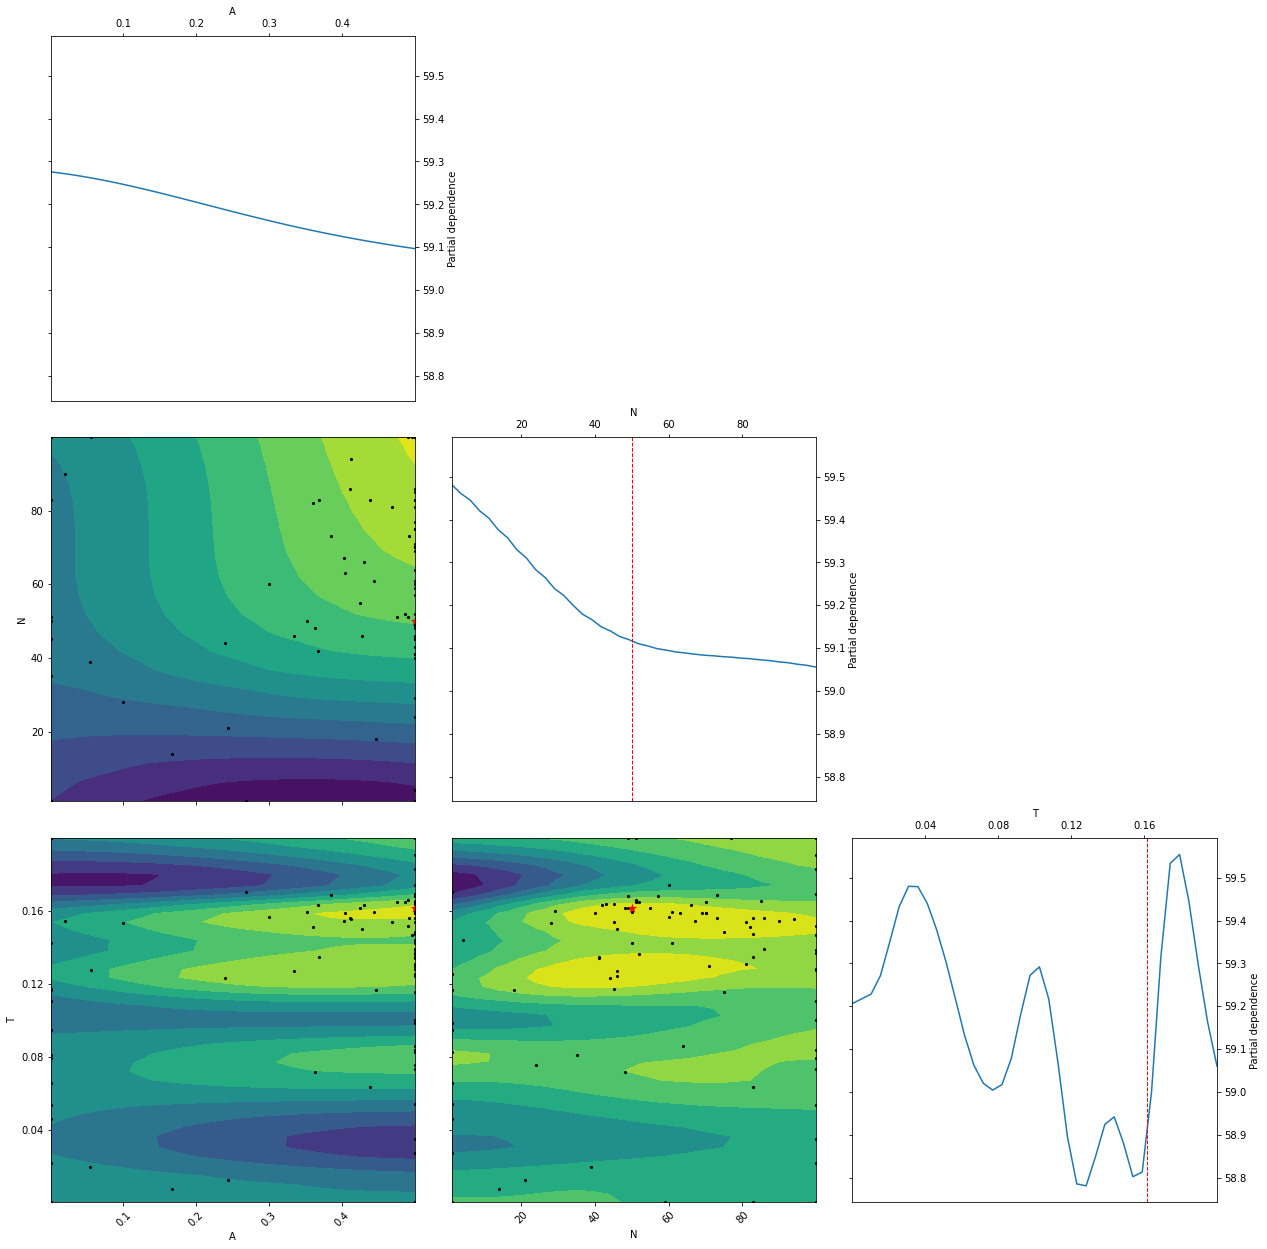

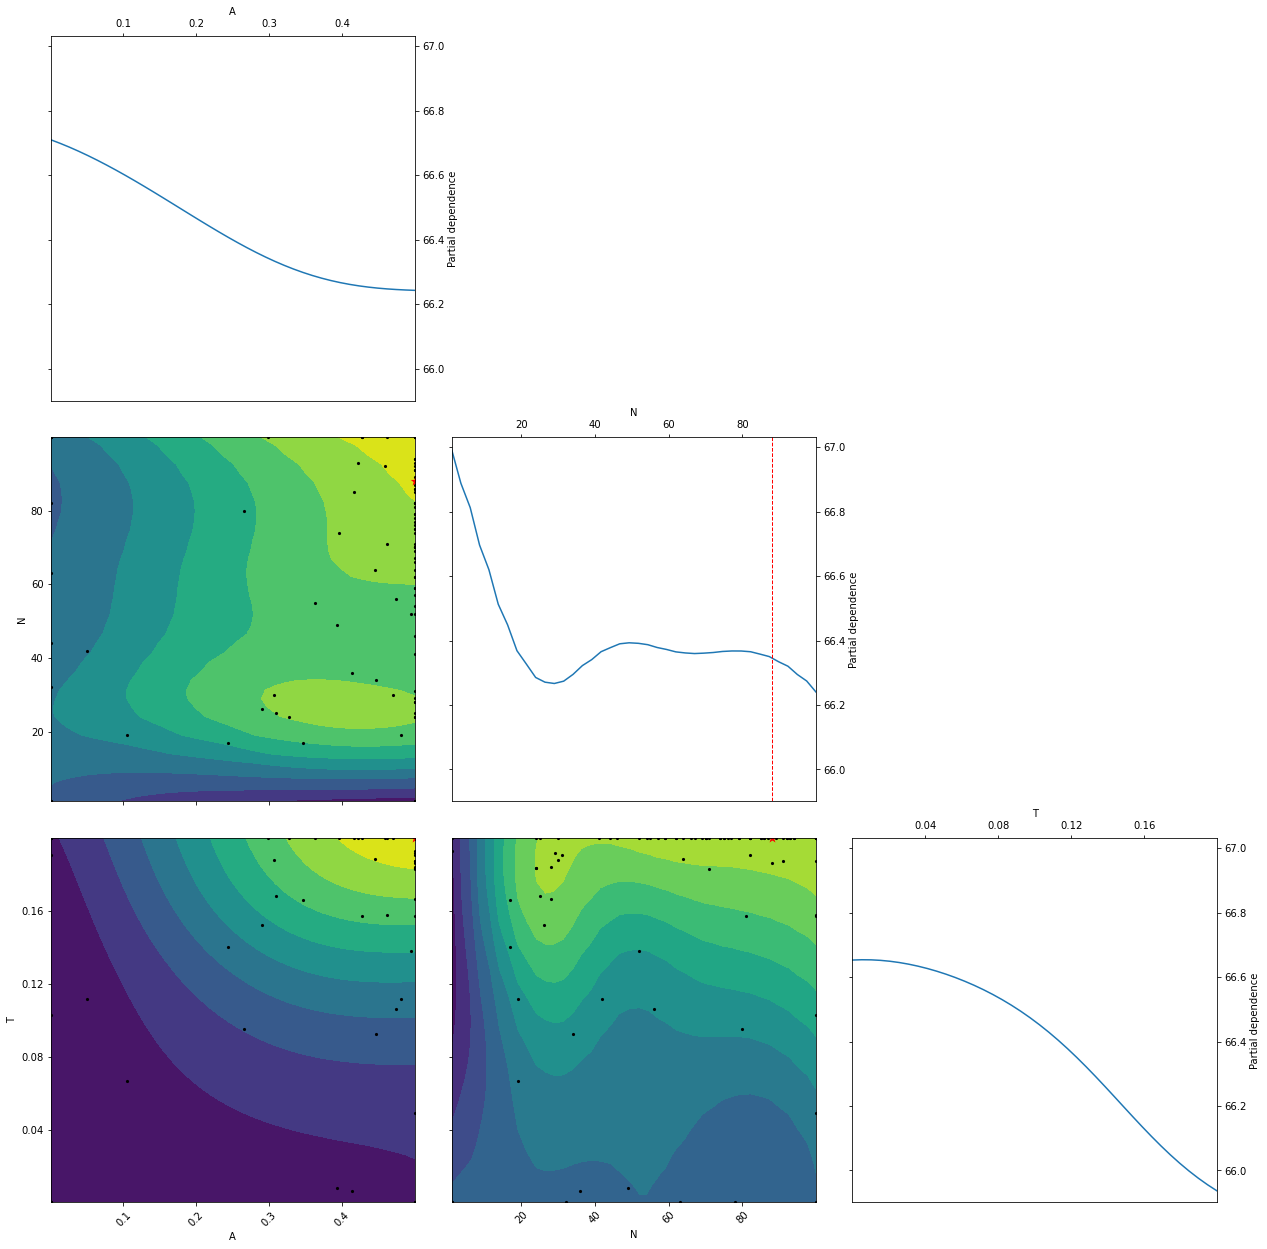

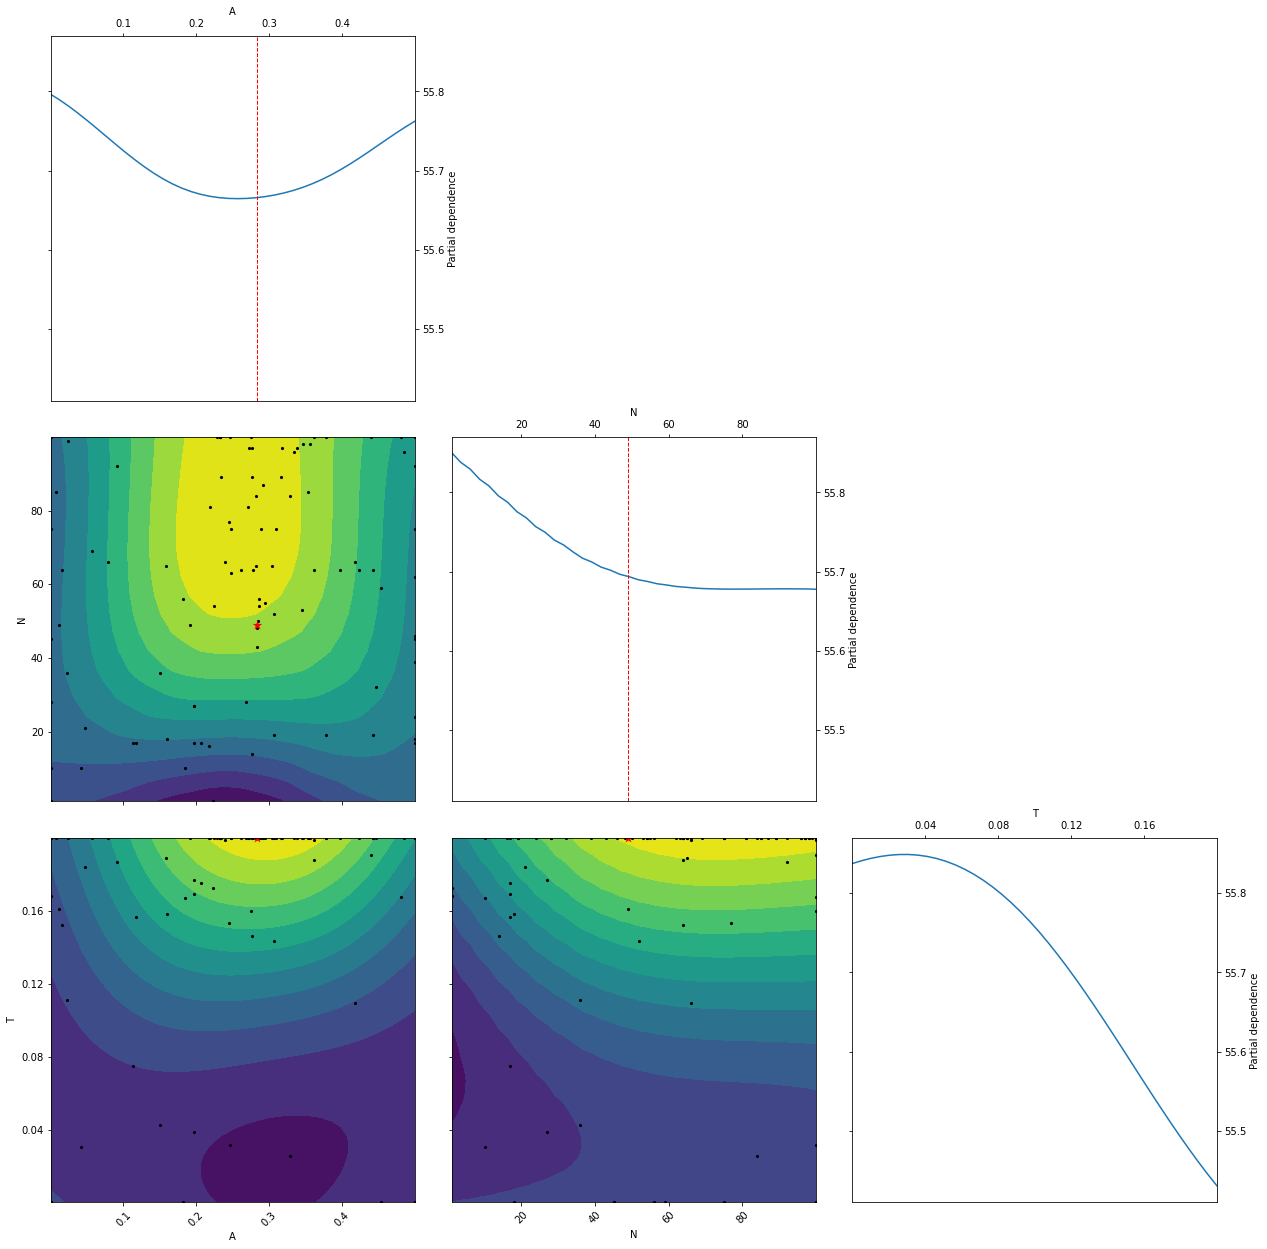

In [2]:
# config_Regressor = [California,playground,Wine,Medicalpremium,Avocado]
# config_Classifier = [fetal_health,ionosphere,santander_customer_satisfaction,music]
save_dir = 'outputs3'
config_train = [ionosphere,music,santander_customer_satisfaction,Wids2021,fetal_health,santander,California,playground,Wine,Medicalpremium,Avocado]
for config in [santander]:
    try:
        results = {}
        history,cv_auc,cv_acc,run_time,df = run_config(config)
        for fold in config.trn_folds:
            ax = plot_objective(history[fold]['opt_result'],size=6)
            plt.savefig(f"{save_dir}/{config.d_name}_{fold}.png")
            history[fold]['opt_result'] = None
        results['history'] = history
        results['cv_auc'] = cv_auc
        results['cv_acc'] = cv_acc
        results['run_time']  = run_time
        with open(f'{save_dir}/{config.d_name}.pkl', 'wb') as outp:
            pickle.dump(results, outp, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print(config)
        print(e)
        print("*"*20)

In [3]:
# with open(f'outputs/{config.d_name}.pkl', 'rb') as inp:
#     config2 = pickle.load(inp)

In [4]:
# %matplotlib inline
# plt.figure(figsize=[20,20])
# for row in range(len(history)):
#     ax = plot_objective(config2.history[row]['opt_result'])
# plt.show()